# 1번 문제

In [26]:
import pandas as pd
import numpy as np
import scipy as sp # 과학 계산용 파이썬 모듈
import scipy.stats as stats

data = pd.read_csv('datasets/1회차 인증 실기 1번.csv')


sample_mean = data.mean().values[0]  # 표본 평균
population_std = data.var().values[0]  # 모표준편차
sample_size = len(data)  # 표본 크기
mu_0 = 60 #모평균

# Z-score 계산
z_score = (sample_mean - mu_0) / (population_std / np.sqrt(sample_size))
print(f"z_score : {z_score:.2f}")

# P-value 계산

p_value = stats.norm.sf(z_score)
print(f"P-value : {p_value:.2f}")

# 유의수준
alpha = 0.05

# 기각 여부 판단
if p_value < alpha:
    print("귀무가설을 기각할 수 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다.")

z_score : -0.85
P-value : 0.80
귀무가설을 기각할 수 없습니다.


# 2번 문제

In [35]:
import pandas as pd
import numpy as np
import scipy as sp # 과학 계산용 파이썬 모듈
import scipy.stats as stats

data = pd.read_csv('datasets/1회차 인증 실기 2번.csv')

# 계산에 필요한 값들
sample_variance = np.var(data, ddof=1, axis=0).values[0]  # 표본 분산 (ddof=1은 샘플 분산을 계산하기 위함)
sample_size = len(data)  # 표본 크기
variance_0 = 4  # 귀무가설에서의 분산

# 카이제곱 검정 통계량 계산
chi_square_stat = (sample_size - 1) * sample_variance / variance_0
print(f"카이제곱 검정 통계량: {chi_square_stat:.2f}")

# P-value 계산 (단측 검정)
p_value = 1 - stats.chi2.cdf(chi_square_stat, df=sample_size - 1)
print(f"P-value: {p_value:.5f}")

# 유의수준
alpha = 0.05

# 기각 여부 판단
if p_value < alpha:
    print("귀무가설을 기각할 수 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다.")

카이제곱 검정 통계량: 61.49
P-value: 0.02644
귀무가설을 기각할 수 있습니다.


# 3번 문제

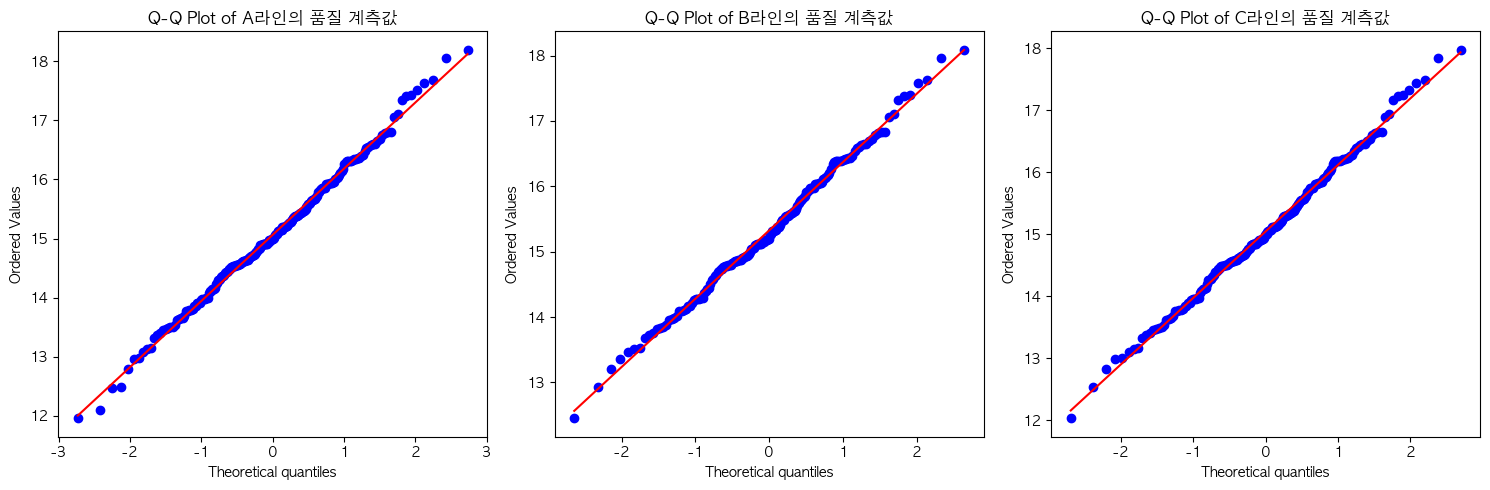

In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv('datasets/1회차 인증 실기 3번 - A.csv')

# Q-Q Plot 그리기
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# A라인
res = stats.probplot(data['A라인의 품질 계측값'], plot=axes[0])
axes[0].set_title('Q-Q Plot of A라인의 품질 계측값')

# B라인
res = stats.probplot(data['B라인의 품질 계측값'].dropna(), plot=axes[1])
axes[1].set_title('Q-Q Plot of B라인의 품질 계측값')

# C라인
res = stats.probplot(data['C라인의 품질 계측값'].dropna(), plot=axes[2])
axes[2].set_title('Q-Q Plot of C라인의 품질 계측값')

# 그래프 표시
plt.tight_layout()
plt.show()

#### (b) 귀무가설 세 라인의 품질 평균이 같다. 대립가설 세 라인의 품질 평균이 다르다.

In [76]:
#(c) ANOVA 검정을 이용해 검정 통계량 값과 지지확률을 계산한 결과를 아래 본문에 첨부하시오

# ANOVA 검정 수행
f_statistic, p_value = stats.f_oneway(data['A라인의 품질 계측값'], 
                                      data['B라인의 품질 계측값'].dropna(), 
                                      data['C라인의 품질 계측값'].dropna())

# 결과 출력
print(f"F-통계량: {f_statistic:.4f}")
print(f"P-value (지지확률): {p_value:.4f}")

# 유의수준 설정
alpha = 0.05

# 기각 여부 판단
if p_value < alpha:
    print("귀무가설을 기각할 수 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다.")


F-통계량: 3.7713
P-value (지지확률): 0.0236
귀무가설을 기각할 수 있습니다.


/var/folders/3_/_4rs10ps6577z2vsry31x7g00000gn/T/ipykernel_44061/848379481.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['A라인의 품질 계측값'], data['B라인의 품질 계측값'].dropna(), data['C라인의 품질 계측값'].dropna()],


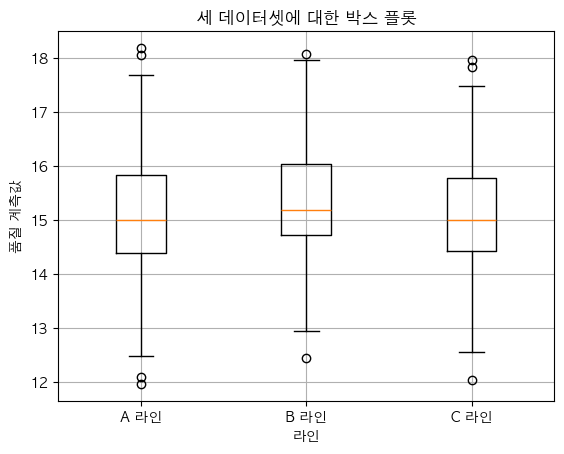

In [78]:
plt.boxplot([data['A라인의 품질 계측값'], data['B라인의 품질 계측값'].dropna(), data['C라인의 품질 계측값'].dropna()], 
            labels=['A 라인', 'B 라인', 'C 라인'])

plt.title('세 데이터셋에 대한 박스 플롯')
plt.ylabel('품질 계측값')
plt.xlabel('라인')
plt.grid(True)

# 그래프 표시
plt.show()

#### (d) Eng'r 의심은 사실이다.

# 4번 문제

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/1회차 인증 실기 4번.csv')

In [95]:
#X,Y 분할
Y=data["y"].copy()
X=data.drop("y",axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=0) # test_size : float or int, int값일시 test data로 분류할 만큼의 sample수


In [96]:
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

In [115]:
# (a)
lr_model = LinearRegression().fit(X_train, Y_train)
y_predict = lr_model.predict(X_test)

print_all_reg(Y_test, y_predict)

model의 MSE 값은 11.097
model의 MAE 값은 2.642
model의 r2 값은 0.268


In [116]:
# (b)
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001).fit(X_train, Y_train)
ri_pred=ridge.predict(X_test)
print_all_reg(Y_test,ri_pred)

model의 MSE 값은 7.072
model의 MAE 값은 2.101
model의 r2 값은 0.533


In [117]:
# (c)
from sklearn.linear_model import Lasso
Lasso_model=Lasso(max_iter = 10000000, alpha = 0.001) # 최대 반복횟수 설정
Lasso_model.fit(X_train, Y_train)
la_pred=Lasso_model.predict(X_test)
print_all_reg(Y_test,la_pred) # 평가지표 출력

model의 MSE 값은 6.825
model의 MAE 값은 2.079
model의 r2 값은 0.550


In [132]:
# (d)
Lasso_model.feature_names_in_[np.where(Lasso_model.coef_ == 0)[0]]

# y값에 매우 작은 영향을 주는 변수들이다.

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X12', 'X13',
       'X14', 'X15', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X45', 'X46', 'X47', 'X48', 'X49', 'X52', 'X53',
       'X54', 'X56', 'X57', 'X58'], dtype=object)

In [133]:
# (e)

from sklearn.decomposition import PCA
#Components 5로 설정
pca_model=PCA(n_components=5)

X_train_pca=pca_model.fit_transform(X_train)
X_test_pca=pca_model.transform(X_test)
pca_model.explained_variance_ratio_ #설명된 분산의 비율
np.cumsum(pca_model.explained_variance_ratio_)
PCR_model=LinearRegression()
PCR_model.fit(X_train_pca, Y_train)
pred=PCR_model.predict(X_test_pca)
print_all_reg(Y_test, pred)

model의 MSE 값은 7.896
model의 MAE 값은 2.282
model의 r2 값은 0.479


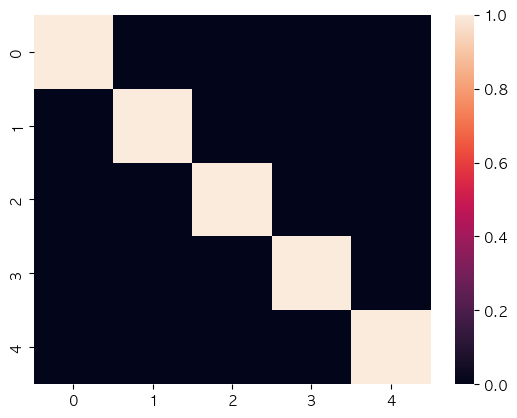

In [145]:
# (f)
import seaborn as sns
sns.heatmap(np.corrcoef(X_train_pca.T))
plt.show()

# 다중공선성이 0이다. (변수 서로간의 영향도가 없다.)

# 5번 문제

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/1회차 인증 실기 5번.csv')

In [3]:

#X,Y 분할 
Y=data["Y"].copy()
X=data.drop("Y",axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=0) # test_size : float or int, int값일시 test data로 분류할 만큼의 sample수


In [6]:
# (a)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

logi_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(Y_test, logi_pred)
print(f"모델 정확도: {accuracy:.4f}")

conf_matrix = confusion_matrix(Y_test, logi_pred)
print("혼동 행렬:")
print(conf_matrix)

print("분류 리포트:")
print(classification_report(Y_test, logi_pred, zero_division=0))

모델 정확도: 0.8343
혼동 행렬:
[[151   0]
 [ 30   0]]
분류 리포트:
              precision    recall  f1-score   support

          -1       0.83      1.00      0.91       151
           1       0.00      0.00      0.00        30

    accuracy                           0.83       181
   macro avg       0.42      0.50      0.45       181
weighted avg       0.70      0.83      0.76       181



In [10]:
# (b)

from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(random_state=0, n_jobs=-1)
rfc_model.fit(X_train,Y_train)

rfc_pred_train = rfc_model.predict(X_train) # 훈련데이터를 활용하여, 학습한 모델로 예측값 생성
rfc_pred=rfc_model.predict(X_test) # 테스트 데이터를 활용하여, 학습한 모델로 예측값 생성

accuracy = accuracy_score(Y_test, rfc_pred)
print(f"모델 정확도: {accuracy:.4f}")

conf_matrix = confusion_matrix(Y_test, rfc_pred)
print("혼동 행렬:")
print(conf_matrix)

print("분류 리포트:")
print(classification_report(Y_test, rfc_pred, zero_division=0))

모델 정확도: 0.8619
혼동 행렬:
[[149   2]
 [ 23   7]]
분류 리포트:
              precision    recall  f1-score   support

          -1       0.87      0.99      0.92       151
           1       0.78      0.23      0.36        30

    accuracy                           0.86       181
   macro avg       0.82      0.61      0.64       181
weighted avg       0.85      0.86      0.83       181



In [15]:
# (c)

# precision = TP/(FP+TP), recall = TP/(FN+TP), 2종 오류 = 1 -recall


In [ ]:
# (d)

# precision : 로지스틱 회귀모델 = 0 , 의사결정나무 = 0.78
# recall : 로지스틱 회귀모델 = 0 , 의사결정나무 = 0.23

# 정확도에서는 큰 차이가 없지만 불량품을 검사하는 능력에서 로직스틱 회귀모델은 성능이 0 이고, 의사결정나무에서는 0.23 수준이다.

# 6번 문제

In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_csv('datasets/1회차 인증 실기 6번 train.csv')

In [92]:
X=data.drop(["Y"],axis=1)
Y=data["Y"].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
X_train.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21'],
      dtype='object')

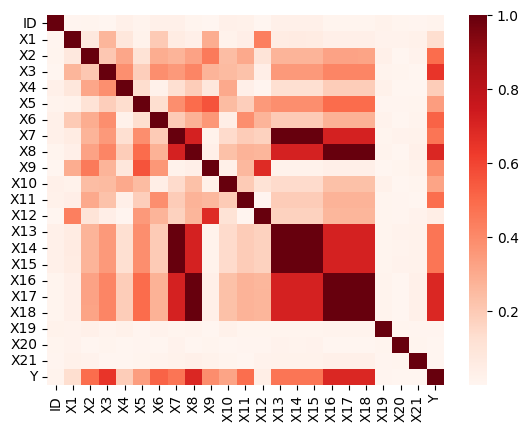

In [93]:
sns.heatmap(abs(data.corr()),cmap ='Reds')
plt.show()

In [94]:
from boruta import BorutaPy

X_arr = X.values
Y_arr = Y.ravel()

from sklearn.ensemble import RandomForestRegressor

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1, max_depth=10)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=2)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_arr, Y_arr)


/var/folders/3_/_4rs10ps6577z2vsry31x7g00000gn/T/ipykernel_44834/4240570705.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Y_arr = Y.ravel()


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	9
I

BorutaPy(estimator=RandomForestRegressor(max_depth=10, n_estimators=50,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x13219AA40),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x13219AA40,
         verbose=2)

In [95]:
# check selected features - first 5 features are selected
print(feat_selector.support_)
# check ranking of features
print(feat_selector.ranking_)
# call transform() on X to filter it down to selected features
print(feat_selector.transform(X_arr))
boruta_use_col = feat_selector.ranking_[:]
boruta_use_col

[False False  True  True  True  True  True False  True  True  True  True
  True False False False  True  True  True False False False]
[ 3 10  1  1  1  1  1  7  1  1  1  1  1  2  6  5  1  1  1  9  8  3]
[[6.50000000e+00 2.40000000e-01 3.20000000e-01 ... 2.03348013e+02
  2.03737225e+02 2.03291469e+02]
 [5.70000000e+00 2.60000000e-01 3.00000000e-01 ... 1.05501698e+02
  1.05488242e+02 1.05993715e+02]
 [6.70000000e+00 3.10000000e-01 1.80000000e-01 ... 2.00753456e+02
  2.00780463e+02 2.00797679e+02]
 ...
 [5.70000000e+00 2.10000000e-01 2.50000000e-01 ... 8.10429774e+01
  8.13624183e+01 8.12296579e+01]
 [6.70000000e+00 4.30000000e-01 2.30000000e-01 ... 1.45873687e+02
  1.45645990e+02 1.45348258e+02]
 [6.40000000e+00 2.00000000e-01 1.50000000e-01 ... 1.13968822e+02
  1.13765787e+02 1.13195833e+02]]


array([ 3, 10,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  2,  6,  5,  1,
        1,  1,  9,  8,  3])

In [96]:
use_col = X_train.columns[feat_selector.ranking_<=1]

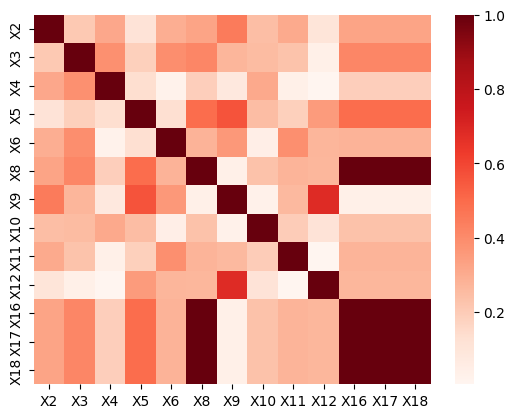

In [97]:
sns.heatmap(abs(data[use_col].corr()),cmap ='Reds')
plt.show()

# 보루타 알고리즘은 다중공선성을 다 없앨 순 없음

In [98]:
# (2)

Y.value_counts()

Y
0    3327
1    1070
Name: count, dtype: int64

In [99]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
from imblearn.combine import SMOTETomek

In [100]:
X_SMOTETomek, Y_SMOTETomek = SMOTETomek(random_state=10).fit_resample(X_train[use_col], Y_train) # 위에서 보루타 알고리즘으로 구한 컬럼 선택
print("====SMOTETomek====")
print(Y_SMOTETomek.value_counts())  # 두가지를 같이 사용하는 방식으로 채택!

====SMOTETomek====
Y
0    2335
1    2335
Name: count, dtype: int64


In [112]:
# (3) 
# Y 값이 0, 1 이므로 분류 문제로 머신러닝 알고리즘 선택 (XGBoost 선택 )

from xgboost import XGBRegressor
from xgboost import XGBClassifier
eval_set = [(X_test[use_col], Y_test)] # 검증용 데이터셋 정의

clf = XGBClassifier(use_label_encoder = False,
                    n_estimators = 100,
                    learning_rate = 0.4,
                    min_child_weight = 10,
                    colsample_bytree = 0.5,
                    max_depth = 8 , gamma = 1, reg_lambda = 0.8)

clf.fit(X_SMOTETomek,Y_SMOTETomek,eval_set = eval_set) # eval_metric 결과가 20회동안 개선되지 않으면 조기종료

preds_train = clf.predict(X_SMOTETomek) # 훈련데이터로 y값 예측
preds = clf.predict(X_test[use_col]) # 테스트 데이터로 y값 예측


[0]	validation_0-logloss:0.39764
[1]	validation_0-logloss:0.27495
[2]	validation_0-logloss:0.19222
[3]	validation_0-logloss:0.14348
[4]	validation_0-logloss:0.10765
[5]	validation_0-logloss:0.08439
[6]	validation_0-logloss:0.06960
[7]	validation_0-logloss:0.05817
[8]	validation_0-logloss:0.05144
[9]	validation_0-logloss:0.04699
[10]	validation_0-logloss:0.04282
[11]	validation_0-logloss:0.03966
[12]	validation_0-logloss:0.03751
[13]	validation_0-logloss:0.03641
[14]	validation_0-logloss:0.03410
[15]	validation_0-logloss:0.03285
[16]	validation_0-logloss:0.03154
[17]	validation_0-logloss:0.03065
[18]	validation_0-logloss:0.02958
[19]	validation_0-logloss:0.02889
[20]	validation_0-logloss:0.02860
[21]	validation_0-logloss:0.02869
[22]	validation_0-logloss:0.02899
[23]	validation_0-logloss:0.02894
[24]	validation_0-logloss:0.02870
[25]	validation_0-logloss:0.02870
[26]	validation_0-logloss:0.02813
[27]	validation_0-logloss:0.02813
[28]	validation_0-logloss:0.02813
[29]	validation_0-loglos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:17:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [115]:
print(f1_score(Y_SMOTETomek,preds_train)) # 훈련성능 출력
print(f1_score(Y_test,preds)) # 테스트 성능 출력

0.9967845659163987
0.9897510980966325


In [132]:
# (d)

ccp_alpha_list = list(np.arange(0,5,0.2)) # 0부터 5까지 0.2간격으로 출력하여 리스트 형태로 반환

train_scores =[]
test_scores =[]

for alpha in ccp_alpha_list: # 모든 감마값에 대하여 모델 적합, 최적의 감마값 도출

    clf = XGBClassifier(n_estimators = 100,
                        learning_rate = 0.4,
                        min_child_weight = 10,
                        colsample_bytree = 0.5,
                        max_depth = 8 , gamma = alpha, reg_lambda = 0.8,eval_metric='logloss')

    clf.fit(X_SMOTETomek, Y_SMOTETomek)

    preds_train = clf.predict(X_SMOTETomek) # 훈련데이터로 y값 예측
    preds = clf.predict(X_test[use_col]) # 테스트 데이터로 y값 예측

    train_scores.append(f1_score(Y_SMOTETomek,preds_train)) # 훈련성능 저장
    test_scores.append(f1_score(Y_test,preds)) # 테스트 성능 저장

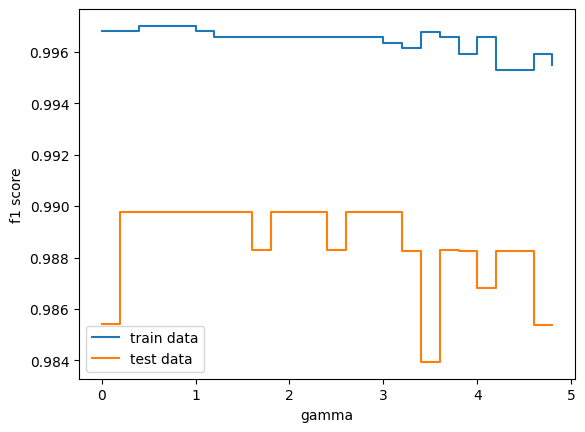

In [133]:
fig, ax = plt.subplots()
ax.set_xlabel("gamma")
ax.set_ylabel("f1 score")
#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, train_scores,  label="train data", drawstyle="steps-post")
ax.plot(ccp_alpha_list, test_scores,  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post")
#ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')

In [138]:
# (5)
from sklearn.ensemble import StackingClassifier

level0 = [
    ('lr', LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs')),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('xgb', XGBClassifier(n_estimators = 100,
                        learning_rate = 0.4,
                        min_child_weight = 10,
                        colsample_bytree = 0.5,
                        max_depth = 8 , gamma = 1, reg_lambda = 0.8,eval_metric='logloss'))
]

# 개별 모델 학습 및 성능 평가
for name, model in level0:
    model.fit(X_SMOTETomek, Y_SMOTETomek)
    Y_pred = model.predict(X_test[use_col])
    print(f'\n{name} Model Performance:')
    print(f1_score(Y_test, Y_pred))

# 메타 모델 정의
level1 = LogisticRegression()

# 스태킹 모델 정의
stacking_model = StackingClassifier(
    estimators=level0,  # 기본 모델들의 리스트. 각 튜플은 (이름, 모델)의 형태
    final_estimator=level1,  # 메타 모델, 기본 모델들의 예측 결과를 입력으로 받아 최종 예측을 수행
    cv=5,  # 교차 검증 분할 수, 기본 모델의 학습을 위한 교차 검증 방법을 설정
    stack_method='auto',  # 기본 모델의 예측 결과를 사용할 방법, 'auto', 'predict_proba', 'decision_function', 'predict' 중 하나
    n_jobs=None,  # 병렬 처리를 위한 CPU 코어 수, None이면 1, -1이면 모든 CPU 코어 사용
    passthrough=False  # True이면 원본 특성을 메타 모델에 추가로 전달, False이면 기본 모델의 예측 결과만 메타 모델에 전달
)
# 스태킹 모델 학습
stacking_model.fit(X_SMOTETomek, Y_SMOTETomek)



lr Model Performance:
0.9738372093023255

rf Model Performance:
0.9824046920821115

xgb Model Performance:
0.9897510980966325


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('rf', RandomForestClassifier(max_depth=10)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_type...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.4, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=None,
                                              min_child_weight=10, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [139]:
# 스태킹 모델 예측 수행
Y_pred = stacking_model.predict(X_test[use_col])

# 스태킹 모델 성능 평가
print(f'\nStacking Model Performance:')
print(f1_score(Y_test, Y_pred))


Stacking Model Performance:
0.9912023460410557


In [ ]:
# stacking 을 이용하여 여러가지 모델들의 출력값으로 다시 학습 시켜서 성능을 올림

In [151]:
test = pd.read_csv('datasets/1회차 인증 실기 6번 test.csv')
result = pd.read_csv('datasets/1회차 인증 실기 6번 sample_submission.csv')

In [155]:
result_pred = stacking_model.predict(test[use_col])

test['predict_result'] = result_pred

In [157]:
merge = pd.merge(result, test[['ID','predict_result']], on='ID')

In [159]:
merge.drop(columns=['predict'], inplace=True)

In [162]:
merge.rename(columns={'predict_result':'predict'}, inplace=True)